# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [2]:
#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## ***What?*** 
<200 words  
In my final project, I will conduct an exploratory analysis of the perceptions of the United Kingdom on automation and artificial intelligence on the one hand and, on the other hand, immigration and globalization, specifically with respect to their impact on economy and job market. In doing so, my project seeks to examine and compare the discourses relevant to the selected keywords (e.g. artificial intelligence, automation, globalization, immigrant, international trade, and robot) in these two countries, in order to highlight the similarities and differences between them.

## ***Why?***
<200 words  
The year of 2016 witness a dramatic rise of the “right-wing populism” in the Western world, which led to the United Kingdom’s referendum vote for its withdrawal from the European Union (better known as Brexit) in June as well as  the election of President Trump in November. At the heart of these great political upsets, it is suggested, lies people’s frustration towards as well as rejection of the rule of global liberal capitalism and, more specifically, the threats of decreasing standard of living and loss of quality jobs allegedly by foreigners through immigration and outsourcing (e.g., building factorins in forieng countries where labor is cheaper). Meanwhile, others stress that increasing automation powered by artificial intelligence is a key threat to job stability, perhaps more significantly so than “bad” trade deals or immigrants. In the midst of such political turmoils, were all British people adequately and equally informed of all relevant facts? Were different news outlets telling different stories with varying emphases concerning key economic issues? My study will shed light on the role of media—newspapers, in particular—with respect to people’s worldview on which they make significant political decisions as well as the growing schism  between different groups with different channels to consume news stories. 

## ***How?***
<400 words  
My project seeks to examine the national discourse(s) in the UK the impacts of both globalization and automation on national economy and job market. More specifically, this project focuses on the published articls by different popular news organiations and how they have presented the relevant key terms to their audiences differently. Ideally, this project can use survey the entire corpus of all published newspaper articles in recent years.  However, for practical concerns, I will limit the scope of my study to the year of 2016 since this is the year when the major political event (the vote for Brexit) took place. Although this is admittedly an arbitrary range of time, I believe this analysis will provide some insight into the general persepctives of news organizations concerning the relevant issues. In addition, being an exploratory investigation into the subject matter, my project will limit its data collection to the top news organization in each country by circulation. Once these organizations are identified, I will use several key terms to filter out articles that are likely irrelevant to my study. The articles will be collected using web scraping codes and, if available, web API. I will save the corpus for each news organization and analyze them seperately. The results of analysis will be compared at the last.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

## ***Which (words)?***
<300 words  
I plan to use the corpora of articles published in 2016 by two leading news organizations with notably different audiences: The Daily Mail and The Guardian. This is because not only a newspaper's view on an issue is likely influenced by their target audience but also it likely shapes their audience’s view on the issue. In particular, the choice of these two media organizations, The Daily Mail and The Guardian, is informed by a conventioanl wisdom that the former is representative of the non-elite conservatives while the latter is favored by the elite liberals in the UK. In addition, these two are among the top newspapers in the country by circulation. That said, I expect that these newspapers and their contents provide a meaningful look into the differing views of their readers. More specifically, I will collect articles from each source that contain a set of selected keywords: artificial intelligence, automation, immigrants, international trade, globalization, and robots (this list of keywords is subject to change). Therefore, in sum, I will examine and compare two corpora: one consisting of The Daily Mail articles with the keywords and the other consisting of The Guardian articles with the keywords.

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

I will use the Latent Semantic Analysis method to illustrate the context embedding of each keyword as well as how the keywords relate to one another in each national corpus consisting of all articles collected from major newspapers in each country. Using word2vec modeling, I will generate word vectors for all keywords for both national corpora. Then the keyword vectors will be examined and compared to one another. To visually represent the pair-wise comparison between word vectors, I can generate a heatmap for each national corpus and analyze the similarities and differences between two heatmaps. Furthermore, I will construct a semantic dimension constructed using the keywords to project a set of selected words concerning and representing the economic reality.

## <span style="color:red">*Your turn*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Chalk, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

# My Annotation Dataset

In [89]:
x = np.array(pandas.read_csv('codes.txt', header = None))
anno = AnnotationsContainer.from_array(x)
y = np.array(pandas.read_csv('codes2.txt', header = None))
anno2 = AnnotationsContainer.from_array(y)

In [90]:
print(x.shape)
print(y.shape)

(5, 20)
(50, 20)


Interrogate the AnnotationsContainer object.

In [91]:
print(anno.annotations)
print(anno2.annotations)

[[0 2 4 3 0 2 4 1 2 0 4 1 4 2 2 2 2 2 2 2]
 [3 1 2 3 0 3 3 2 0 2 1 3 2 2 0 3 3 4 2 2]
 [1 1 0 4 3 3 2 2 4 2 4 0 4 0 1 3 4 2 2 3]
 [2 2 4 1 1 4 3 1 3 2 2 4 3 2 1 2 0 2 2 2]
 [2 2 1 2 3 2 1 2 3 1 0 2 3 1 4 3 1 3 1 3]]
[[0 2 3 3 2 3 3 1 2 2 2 3 1 1 2 1 2 4 3 1]
 [2 2 3 4 1 2 1 3 2 1 2 3 4 2 2 3 1 2 1 1]
 [3 3 2 1 2 0 2 3 2 3 4 3 4 4 1 0 0 3 3 2]
 [3 3 3 1 2 2 2 3 2 0 2 3 3 2 3 0 2 1 0 2]
 [2 0 2 2 2 3 2 2 1 0 4 2 2 3 0 3 2 2 1 2]
 [2 2 2 2 2 4 2 2 2 2 1 2 3 3 4 0 2 0 2 2]
 [2 2 2 0 0 0 2 3 0 2 1 2 3 1 2 2 3 2 2 3]
 [1 4 0 2 3 1 4 4 2 0 2 2 2 2 1 3 0 0 1 3]
 [3 1 2 3 4 2 2 3 2 2 2 1 3 0 3 2 2 2 0 1]
 [2 2 1 3 4 4 1 4 2 1 2 1 3 2 3 1 1 2 3 2]
 [4 1 4 3 2 3 4 0 2 3 1 2 2 3 2 0 2 2 2 3]
 [0 3 3 2 1 2 1 2 1 2 1 3 3 1 0 3 1 2 2 4]
 [2 2 2 3 1 3 0 2 0 1 1 3 2 0 2 2 3 3 3 4]
 [3 2 2 2 0 1 4 2 2 4 0 1 3 2 3 3 1 1 2 3]
 [1 0 0 0 1 2 3 3 4 1 2 1 0 2 0 1 3 1 2 1]
 [4 4 2 3 3 1 3 4 3 2 3 3 1 4 0 4 2 2 3 2]
 [1 1 2 3 1 2 1 2 3 0 1 1 0 0 3 2 0 1 3 1]
 [0 2 1 2 2 2 2 1 2 3 2 4 0 1 1 1 2 4 2 2]
 [3 2 1 1 

In [92]:
print(anno.labels)
print(anno2.labels)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [7]:
anno.missing_values

[]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [93]:
print(pyanno.measures.agreement.labels_frequency(anno.annotations,5))
print(pyanno.measures.agreement.labels_frequency(anno2.annotations,5))

[ 0.11  0.17  0.37  0.21  0.14]
[ 0.097  0.2    0.39   0.22   0.093]


[[ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[  0.   1.   4.   1.   0.]
 [  1.   3.   2.   2.   2.]
 [  3.   2.  10.   1.   0.]
 [  1.   1.   4.   5.   1.]
 [  1.   3.   1.   0.   1.]]


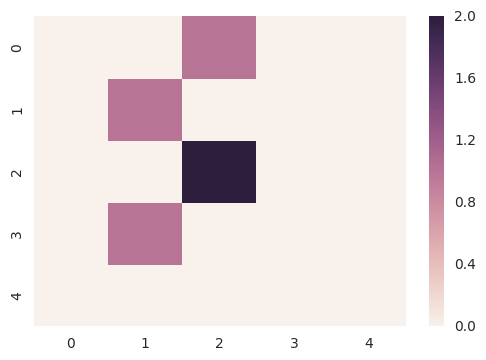

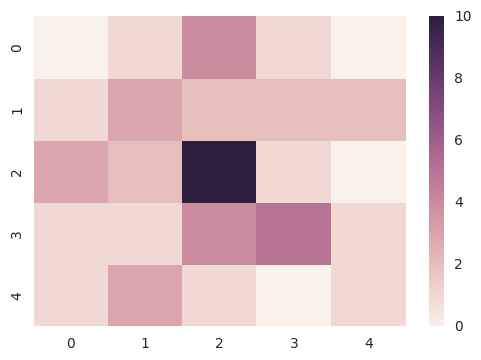

In [132]:
# plot confusion matrix
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
c2 = pyanno.measures.agreement.confusion_matrix(anno2.annotations[:,0], anno2.annotations[:,1],5)
print(c)
print(c2)
ac = seaborn.heatmap(c)
plt.show()
ac2 = seaborn.heatmap(c2)
plt.show()

In [95]:
# Scott's pi between first and second 'coders'
print(scotts_pi(anno.annotations[:,0], anno.annotations[:,1]))
print(scotts_pi(anno2.annotations[:,0], anno2.annotations[:,1]))

0.375
0.17837264776


In [96]:
# Fleiss' kappa
print(fleiss_kappa(anno.annotations[::]))
print(fleiss_kappa(anno2.annotations[::]))

-0.00488563180102
-0.00927083908611


In [97]:
# Krippendorff's alpha
print(krippendorffs_alpha(anno.annotations[::]))
print(krippendorffs_alpha(anno2.annotations[::]))

-0.0360199769497
-1.32041091188e-05


In [98]:
# Cohne's kappa between first and second 'coders'
print(cohens_kappa(anno.annotations[:,0], anno.annotations[:,1]))
print(cohens_kappa(anno2.annotations[:,0], anno2.annotations[:,1]))

0.411764705882
0.182489451477


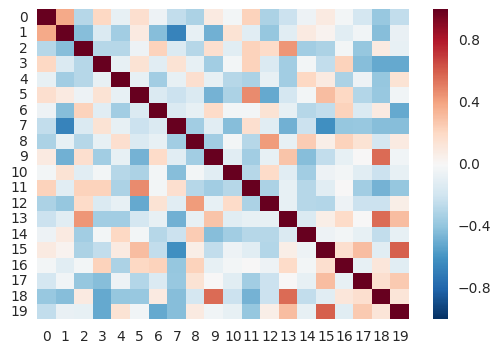

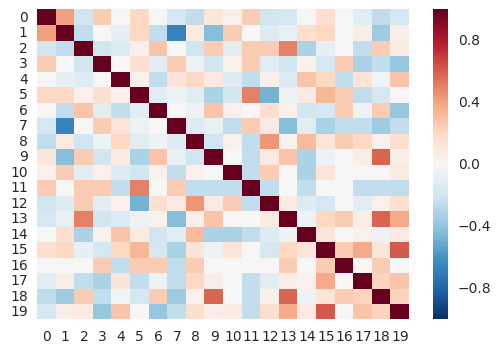

In [99]:
# plot both heatmaps (top: Scott's pi, bottom: Cohen's kappa)
mp = pairwise_matrix(scotts_pi, anno.annotations)
mk = pairwise_matrix(cohens_kappa, anno.annotations)
seaborn.heatmap(mp)
plt.show()
seaborn.heatmap(mk)
plt.show()

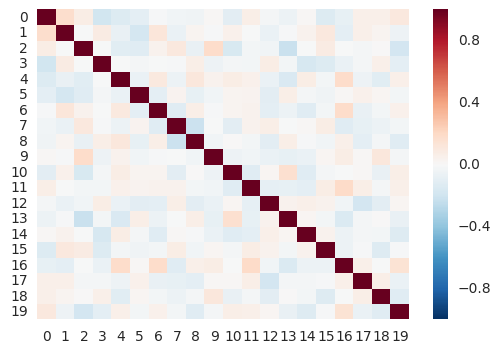

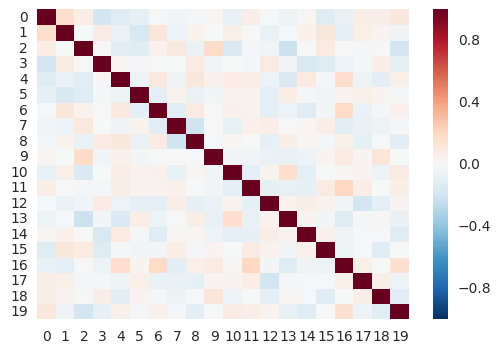

In [100]:
# plot both heatmaps (top: Scott's pi, bottom: Cohen's kappa)
mp2 = pairwise_matrix(scotts_pi, anno2.annotations)
mk2 = pairwise_matrix(cohens_kappa, anno2.annotations)
seaborn.heatmap(mp2)
plt.show()
seaborn.heatmap(mk2)
plt.show()

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [101]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
print(pairwise_metric_average(cohens_kappa, anno.annotations))
print(pairwise_metric_average(cohens_kappa, anno2.annotations))

0.00385983465545
-0.00852410768974


In [102]:
# Cohen's weighted kappa
print(cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1]))
print(cohens_weighted_kappa(anno2.annotations[:,0], anno2.annotations[:,1]))

0.0909090909091
0.0634920634921


Or averaged over the total:

In [103]:
print(pairwise_metric_average(cohens_weighted_kappa,anno.annotations))
print(pairwise_metric_average(cohens_weighted_kappa,anno2.annotations))

-0.0175124199889
-0.00650668932483


Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

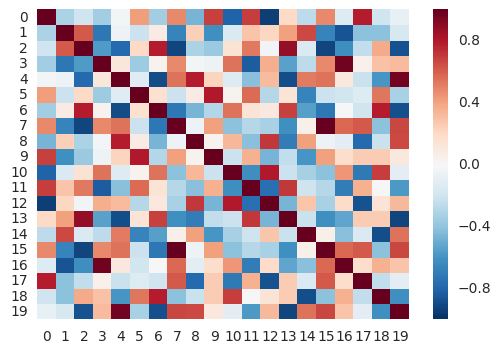

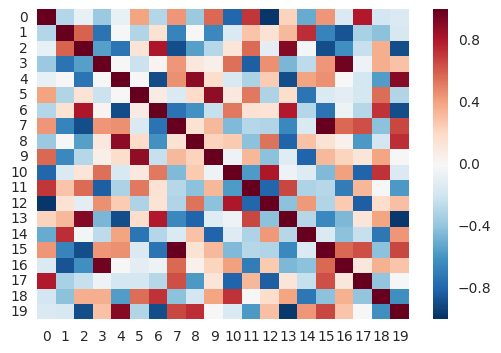

In [41]:
# plot both heatmaps (top: Person's rho, bottom: Spearman's rho)
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

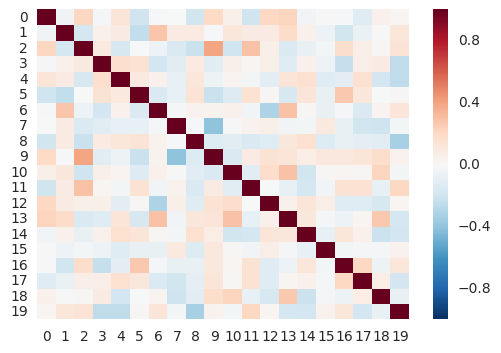

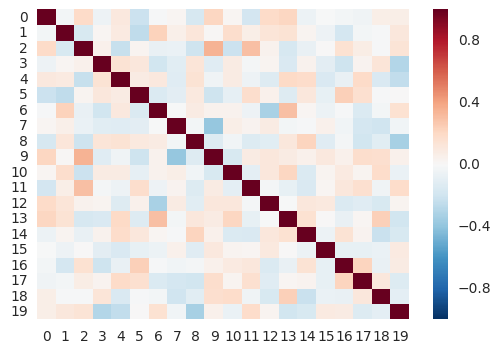

In [104]:
# plot both heatmaps (top: Person's rho, bottom: Spearman's rho)
n2 = pairwise_matrix(pearsons_rho, anno2.annotations)
m2 = pairwise_matrix(spearmans_rho, anno2.annotations)
an2 = seaborn.heatmap(n2)
plt.show()
am2 = seaborn.heatmap(m2)
plt.show()

Or averaged over all comparable pairs:

In [105]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))
print(pairwise_metric_average(pearsons_rho,anno2.annotations), pairwise_metric_average(spearmans_rho,anno2.annotations))

-0.0399041526827 -0.0369840988924
-0.00132610330239 -0.000504921283098


## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

# Models

The models should provide similar results. To estimate the parameters for any models, we first need to create a new model. 

In [136]:
# create a new instance of model Bt, with 5 label classes
model = ModelBt.create_initial_state(5, 20)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))
print(model.log_likelihood(anno2.annotations))

[ 0.70459557  0.91216283  0.74939011  0.63194201  0.8197296   0.71009125
  0.68862806  0.60959089  0.94116423  0.87891184  0.75271425  0.77571965
  0.71565027  0.89851445  0.7003969   0.6531678   0.69421061  0.74735658
  0.7055235   0.86012016]
-196.898916593
-1920.42593605


Pyanno allows one to use either MLE (maximum likelihood estimation) or MAP (maximum a posteriori estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator.

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [137]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))
posterior = model.infer_labels(anno.annotations)
print(posterior)

[ 0.75377526  0.59323968  0.44187958  0.61532597  0.44290356  0.53167066
  0.40689979  0.50603069  0.60167501  0.90781018  0.63320937  0.45149525
  0.60021598  0.79979232  0.404214    0.77563169  0.66099703  0.84429427
  0.88936437  0.94403263]
-165.451379377
[[  4.56574592e-09   2.33287994e-13   9.99999995e-01   1.61340787e-10
    7.77924060e-13]
 [  5.12295502e-08   2.29905315e-10   9.97114499e-01   2.88544921e-03
    1.54520251e-11]
 [  5.44431459e-05   3.67970302e-07   9.62650269e-01   3.72919571e-02
    2.96265969e-06]
 [  4.04788475e-12   6.82170971e-13   1.00000000e+00   4.37783238e-10
    1.78201820e-14]
 [  3.44325925e-07   3.97335389e-04   1.33175450e-02   9.86284775e-01
    9.81254260e-11]]


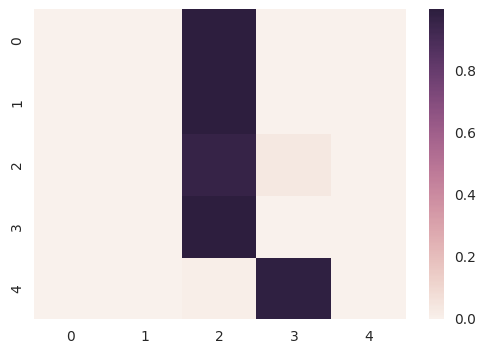

In [138]:
# plot the posterior with ModelBt
ax = seaborn.heatmap(posterior[::])
plt.show()

In [139]:
model.map(anno2.annotations)
print(model.theta)
print(model.log_likelihood(anno2.annotations))
posterior2 = model.infer_labels(anno2.annotations)
print(posterior2)

[ 0.28935863  0.53973574  0.35898371  0.61743505  0.57743884  0.26859822
  0.43289798  0.32595876  0.47723667  0.36816245  0.59650201  0.36185647
  0.31977739  0.31346823  0.26148037  0.44405927  0.55318074  0.50220487
  0.29218418  0.5274585 ]
-1536.35315444
[[  2.40971224e-05   5.09669255e-03   9.78106761e-01   1.67724052e-02
    4.45623358e-08]
 [  4.20392811e-05   2.17026469e-01   7.76770752e-01   6.16035912e-03
    3.80904840e-07]
 [  3.34969435e-03   4.78978784e-03   6.41748969e-01   3.50109364e-01
    2.18458535e-06]
 [  7.82141381e-05   6.02367262e-04   9.93383683e-01   5.93573093e-03
    4.74767274e-09]
 [  7.32410930e-06   1.03675853e-05   9.99963384e-01   1.89217256e-05
    2.08775145e-09]
 [  7.02103428e-07   1.17050049e-06   9.99997255e-01   8.72743148e-07
    8.45553251e-11]
 [  3.08049070e-03   6.38892378e-04   9.90172641e-01   6.10796391e-03
    1.21467491e-08]
 [  1.23903427e-02   2.41505688e-03   9.41981191e-01   4.32109544e-02
    2.45556293e-06]
 [  1.27632587e-05  

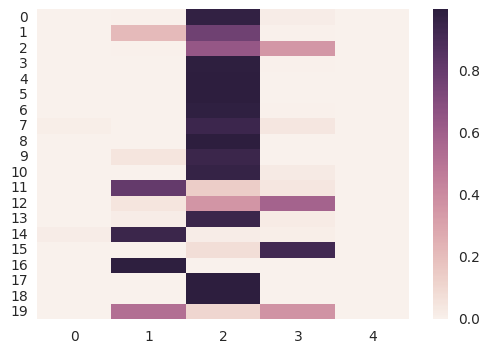

In [140]:
# plot the posterior with ModelBt
ax = seaborn.heatmap(posterior2[:20,])
plt.show()

In [142]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
print(samples.mean(axis=0))
print(samples.std(axis=0))
samples2 = model.sample_posterior_over_accuracy(anno2.annotations, 200, burn_in_samples=100, thin_samples=3)
print(samples2.mean(axis=0))
print(samples2.std(axis=0))

[ 0.46550385  0.52287876  0.50610122  0.39765188  0.36749738  0.52163327
  0.45665351  0.40041368  0.34472814  0.66525859  0.37897139  0.27406762
  0.34828132  0.65940581  0.4084825   0.63369431  0.50769975  0.58697327
  0.58193914  0.51506902]
[ 0.17215301  0.1756207   0.21299666  0.17384541  0.13558415  0.17199796
  0.16353746  0.17039707  0.13677119  0.2645427   0.14319102  0.1078143
  0.15557783  0.1951271   0.19632129  0.15977412  0.17473655  0.14502202
  0.15906894  0.14739521]
[ 0.34394024  0.42826521  0.31409988  0.49517277  0.47186482  0.35279909
  0.48055474  0.36094114  0.55414616  0.30567815  0.55858051  0.43355899
  0.25139419  0.39222433  0.19984109  0.37261531  0.51528731  0.45323054
  0.43087858  0.42910764]
[ 0.05180521  0.05438231  0.07090647  0.05529701  0.06036482  0.05147684
  0.07998962  0.08141755  0.07205652  0.03322989  0.05014088  0.07188954
  0.06955788  0.07375054  0.03449362  0.05512989  0.03914829  0.0348531
  0.07638682  0.06185128]


Let's try everything again with ModelB

In [143]:
# create a new instance of model B, with 5 label classes and 20 annotators.
model = ModelB.create_initial_state(5, 20)
print(model.theta)
print(model.log_likelihood(anno.annotations))
print(model.log_likelihood(anno2.annotations))

[[[  6.05734147e-01   1.14396749e-01   2.27333625e-01   3.07252034e-02
     2.18102757e-02]
  [  1.12610733e-01   6.86848242e-01   4.77232921e-02   5.46950479e-02
     9.81226847e-02]
  [  3.30902616e-02   2.60086966e-01   5.20910536e-01   1.33599455e-01
     5.23127811e-02]
  [  2.86209683e-02   3.88960331e-02   1.90478915e-01   6.42309848e-01
     9.96942359e-02]
  [  8.11849617e-02   1.79686835e-02   7.42099434e-02   1.10110678e-01
     7.16525733e-01]]

 [[  6.78222124e-01   2.57054857e-01   1.55260580e-02   3.30290140e-02
     1.61679469e-02]
  [  2.07317564e-01   6.38756044e-01   1.08120694e-01   1.95160623e-03
     4.38540910e-02]
  [  1.60494389e-02   4.21879634e-02   7.43367760e-01   1.50737464e-01
     4.76573740e-02]
  [  1.31224111e-02   8.29374337e-02   2.30878360e-01   4.94495078e-01
     1.78566717e-01]
  [  4.88542832e-02   5.10066602e-02   9.48971830e-02   1.40597152e-01
     6.64644721e-01]]

 [[  5.67885143e-01   2.87283569e-01   1.14255879e-02   6.09082466e-02
     

In [144]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

posterior = model.infer_labels(anno.annotations)
print(posterior)

[[[ 0.78947368  0.15789474  0.05263158  0.          0.        ]
  [ 0.13636364  0.68181818  0.13636364  0.04545455  0.        ]
  [ 0.07142857  0.14285714  0.60714286  0.14285714  0.03571429]
  [ 0.          0.04545455  0.13636364  0.68181818  0.13636364]
  [ 0.          0.          0.05263158  0.15789474  0.78947368]]

 [[ 0.78947368  0.15789474  0.05263158  0.          0.        ]
  [ 0.13636364  0.68181818  0.13636364  0.04545455  0.        ]
  [ 0.03571429  0.17857143  0.64285714  0.10714286  0.03571429]
  [ 0.          0.04545455  0.13636364  0.68181818  0.13636364]
  [ 0.          0.          0.05263158  0.15789474  0.78947368]]

 [[ 0.78947368  0.15789474  0.05263158  0.          0.        ]
  [ 0.13636364  0.68181818  0.13636364  0.04545455  0.        ]
  [ 0.07142857  0.14285714  0.57142857  0.10714286  0.10714286]
  [ 0.          0.04545455  0.13636364  0.68181818  0.13636364]
  [ 0.          0.          0.05263158  0.15789474  0.78947368]]

 [[ 0.78947368  0.15789474  0.0526

/usr/local/lib/python3.5/dist-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


In [145]:
model.map(anno2.annotations)
print(model.theta)
print(model.log_likelihood(anno2.annotations))

posterior2 = model.infer_labels(anno2.annotations)
print(posterior2)

[[[  7.89473684e-001   1.57894737e-001   5.26315789e-002   0.00000000e+000
     0.00000000e+000]
  [  1.25077803e-001   7.08149055e-001   1.25077821e-001   4.16953208e-002
     0.00000000e+000]
  [  9.99686232e-002   1.57307692e-001   4.42710069e-001   2.14217547e-001
     8.57960691e-002]
  [  3.35813500e-077   4.34915770e-002   1.30499436e-001   6.52373646e-001
     1.73635342e-001]
  [  0.00000000e+000   0.00000000e+000   5.26315789e-002   1.57894737e-001
     7.89473684e-001]]

 [[  7.89473684e-001   1.57894737e-001   5.26315789e-002   0.00000000e+000
     0.00000000e+000]
  [  1.66591052e-001   6.66635804e-001   1.25080520e-001   4.16926233e-002
     0.00000000e+000]
  [  8.57488261e-002   1.71526707e-001   5.14115304e-001   1.71374775e-001
     5.72343875e-002]
  [  0.00000000e+000   4.34939587e-002   1.30499436e-001   6.52373646e-001
     1.73632960e-001]
  [  0.00000000e+000   0.00000000e+000   5.26315789e-002   1.57894737e-001
     7.89473684e-001]]

 [[  7.89473684e-001   1.5

/usr/local/lib/python3.5/dist-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


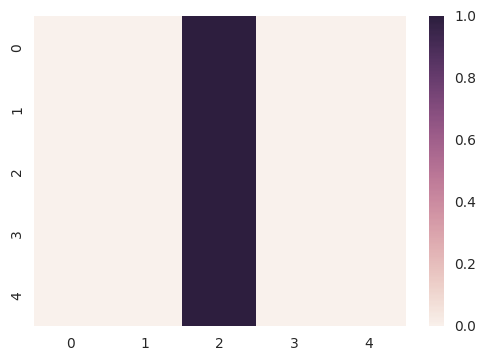

In [146]:
# Plot the posterior with ModelB
ax = seaborn.heatmap(posterior[::])
plt.show()

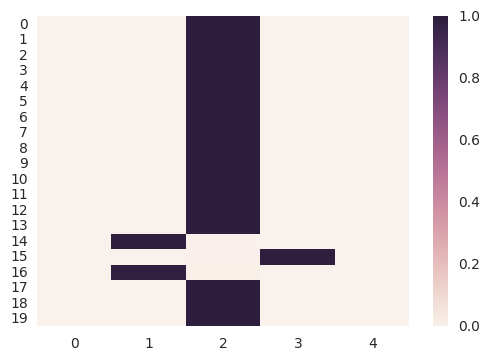

In [147]:
# Plot the posterior with ModelB
ax = seaborn.heatmap(posterior2[:20,])
plt.show()

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. For some analyses, we may simply use the posterior themselves rather than the most probably code outcome.

# Generating Annotations

In [148]:
# To generate artifical data from a model
model = ModelBt.create_initial_state(5, 5, theta=[0.99,0.75,0.50,0.25,0.1])
#randome generate annotations with 5 label classes and 5 annotators. The accuracy of the three annotators are 0.99, 0.75, and 0.25 respectively.
model.generate_annotations(20)

array([[4, 4, 4, 4, 0],
       [4, 4, 4, 4, 4],
       [0, 4, 4, 2, 4],
       [4, 4, 0, 0, 0],
       [2, 2, 1, 3, 1],
       [0, 0, 0, 4, 4],
       [0, 1, 2, 2, 3],
       [4, 1, 3, 4, 1],
       [0, 0, 1, 0, 2],
       [0, 0, 0, 2, 2],
       [4, 4, 2, 2, 2],
       [0, 4, 0, 4, 1],
       [1, 1, 1, 2, 0],
       [2, 2, 1, 2, 1],
       [1, 4, 1, 1, 2],
       [0, 0, 2, 1, 1],
       [2, 2, 0, 1, 1],
       [0, 3, 0, 0, 1],
       [0, 0, 0, 1, 3],
       [1, 1, 0, 2, 2]])

## Visualizing coder accuracy

Pyanno provides a [graphical user interface](http://docs.enthought.com/uchicago-pyanno/user_guide.html) for making plots. However, it is not compatible with ipyton notebook. Nevertheless, nothing prevents us from making plots using matplotlib. Let's make a plot of the accuracy of each annotator inferred from ModelBt.

In [149]:
model = ModelBt.create_initial_state(5,20)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

In [150]:
model.mle(anno2.annotations)
samples2 = model.sample_posterior_over_accuracy(anno2.annotations, 200, burn_in_samples=100, thin_samples=3)
y2 =  samples2.mean(axis=0)
y_ci2 = samples2.std(axis=0)

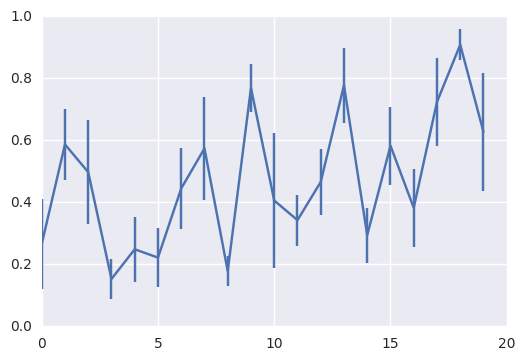

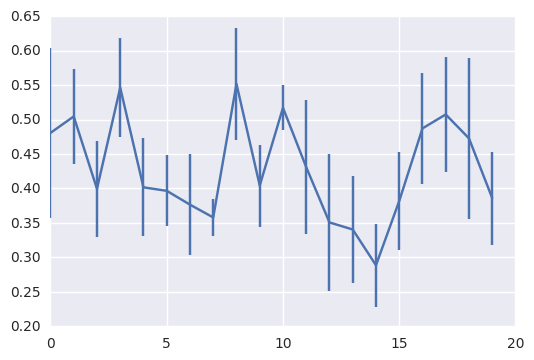

In [151]:
plt.figure()
plt.errorbar(range(20),y, yerr = y_ci)
plt.show()
plt.figure()
plt.errorbar(range(20),y2, yerr = y_ci2)
plt.show()

# Memo

For this session, I have generate two sets of pseudo codes: a 5 by 20 matrix and a 50 by 20 matrix. This is to simulates the situations in which 20 annotators code five or fifty items where each of the items have five possible choices. In both cases, the five possible choices have associated probabilities used to generate them: 0.1 for `0`, 0.2 for `1`, 0.4 for `2`, 0.2 for `3`, and 0.1 for `4`. The resulting matrice are imported and saved as numpy array objects, x and y.

The comparison between these two offers some interesting points. For example, compared to that of x, the confusion matrix between two 'coders' for y shows more clearly that both are likely to choose the option `2`. On the other hand, the set of heatmaps comparing coders using Pearson's $\rho$ and Spearman's $\rho$ show that the correlation among coders is approximately zero in the second matrix, y.  

For the modeling part of this exercise, I could use only ModelB and ModelBt; it seems that ModelA is not applicable to my data because it is not 'looped' like the example in the original notebok. The final coder accuracy plots show that while the first set of sampels generated from the 5 by 20 data shows much variance, the second set of samples generated are much tightly distributed around 0.5.